In [22]:
import numpy as np
from Ausgleichsbecken_class_file import Ausgleichsbecken_class
import matplotlib.pyplot as plt
from pressure_conversion import pressure_conversion

In [23]:
# define constants
initial_level               = 5.        # m
initial_influx              = 0.        # m³/s
initial_outflux             = 0.        # m³/s
initial_pipeline_pressure   = 1.
initial_pressure_unit       = 'bar'
conversion_pressure_unit    = 'mWS'

area_base                   = 1.        # m²
area_outflux                = 0.5       # m²
critical_level_low          = 0.        # m
critical_level_high         = 10.       # m
simulation_timestep         = 0.001     # s

# for while loop
total_min_level             = 0.01      # m
total_max_time              = 150       # s

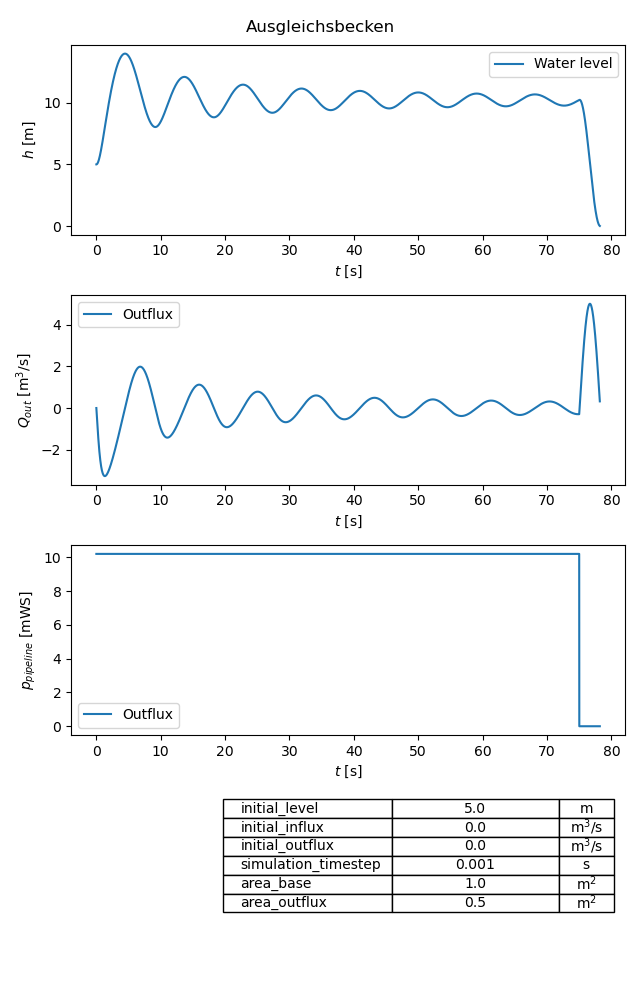

In [24]:
%matplotlib widget

V = Ausgleichsbecken_class(area_base, area_outflux, critical_level_low, critical_level_high,simulation_timestep)
V.set_initial_level(initial_level) 
V.set_influx(initial_influx)
V.set_outflux(initial_outflux)

converted_pressure, V.pressure_unit = pressure_conversion(initial_pipeline_pressure,input_unit = initial_pressure_unit, target_unit = conversion_pressure_unit)
V.pressure = converted_pressure

time_vec        = np.arange(0,total_max_time,simulation_timestep)
outflux_vec     = np.empty_like(time_vec)
outflux_vec[0]  = initial_outflux
level_vec       = np.empty_like(time_vec)
level_vec[0]    = initial_level

pressure_vec    = np.full_like(time_vec,converted_pressure)*np.exp(-time_vec/100)
  
 
i_max = -1

for i in range(np.size(time_vec)-1):
    V.pressure = pressure_vec[i]
    V.e_RK_4()
    V.level = V.update_level(V.timestep)
    V.set_volume()
    outflux_vec[i+1] = V.outflux
    level_vec[i+1]   = V.level
    if V.level < total_min_level:
        i_max = i
        break


fig1, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1)
fig1.set_figheight(10)
fig1.suptitle('Ausgleichsbecken')

ax1.plot(time_vec[:i_max],level_vec[:i_max], label='Water level')
ax1.set_ylabel(r'$h$ ['+V.level_unit+']')
ax1.set_xlabel(r'$t$ ['+V.time_unit+']')
ax1.legend()

ax2.plot(time_vec[:i_max],outflux_vec[:i_max], label='Outflux')
ax2.set_ylabel(r'$Q_{out}$ ['+V.flux_unit+']')
ax2.set_xlabel(r'$t$ ['+V.time_unit+']')
ax2.legend()

ax3.plot(time_vec[:i_max],pressure_vec[:i_max], label='Outflux')
ax3.set_ylabel(r'$p_{pipeline}$ ['+V.pressure_unit+']')
ax3.set_xlabel(r'$t$ ['+V.time_unit+']')
ax3.legend()

# plt.subplots_adjust(left=0.2, bottom=0.2)
ax4.set_axis_off()
cell_text = np.array([[initial_level, V.level_unit], \
            [initial_influx, V.flux_unit], \
            [initial_outflux, V.flux_unit], \
            [simulation_timestep, V.time_unit], \
            [area_base, V.area_unit], \
            [area_outflux, V.area_unit]])

row_labels =['initial_level', \
            'initial_influx', \
            'initial_outflux', \
            'simulation_timestep', \
            'area_base', \
            'area_outflux']

plt.table(cellText=cell_text, \
            cellLoc='center', \
            colWidths=[0.3,0.1,0.3], \
            rowLabels=row_labels, \
            loc = 1, \
            rowLoc='left', \
            fontsize = 15.)

fig1.tight_layout()            